# Task 1
Build a Map for a road junction

In [63]:
import matplotlib.pyplot as plt
import copy
from typing import *
from matplotlib.patches import FancyArrow
import numpy as np

Designing a MAP [10x10] matrix(2 lane road)
road width 6
1-blocked
0-allowed moves

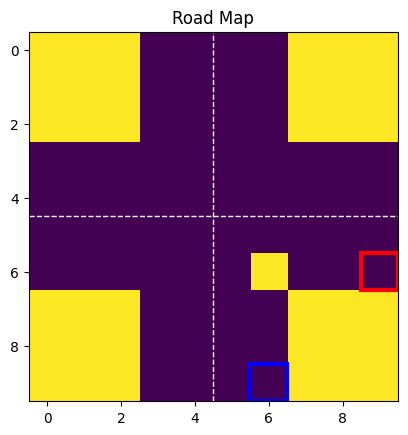

In [64]:

FREE = 0
OCCUPIED = 100

grid_map = [[1, 1, 1, 0, 0, 0, 0, 1, 1, 1],  
            [1, 1, 1, 0, 0, 0, 0, 1, 1, 1],  
            [1, 1, 1, 0, 0, 0, 0, 1, 1, 1],  
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  
            [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],  
            [1, 1, 1, 0, 0, 0, 0, 1, 1, 1],  
            [1, 1, 1, 0, 0, 0, 0, 1, 1, 1],  
            [1, 1, 1, 0, 0, 0, 0, 1, 1, 1]]

grid_map = [[cell* OCCUPIED for cell in row] for row in grid_map]

plt.imshow(grid_map);
plt.title("Road Map")

start = (9,6)
goal = (6,9)

plt.plot([4.5,4.5],[9.5,-0.5], linestyle='--',color='white', linewidth=1) #added vertical lane
plt.plot([-0.5,9.5],[4.5,4.5], linestyle='--',color='white', linewidth=1) #added horizontal lane
rect = plt.Rectangle((start[1]-.5, start[0]-.5), 1,1, fill=False, color="blue", linewidth=3)
plt.gca().add_patch(rect);

rect = plt.Rectangle((goal[1]-.5, goal[0]-.5), 1,1, fill=False, color="red", linewidth=3)
plt.gca().add_patch(rect);

Helping Functions

In [65]:
def is_valid(pos: tuple, grid_map: List[List[int]]) -> bool:
    """ given an index pair, eg. (6,4), check if it is inside the grid map and it is free """
    # if the pos is beyond the map, return false
    if pos[0]<0 or pos[1]<0 or pos[0]>len(grid_map)-1 or pos[1]>len(grid_map[0])-1:
        return False
    
    # if the pos is occupied, return false
    if grid_map[pos[0]][pos[1]] == OCCUPIED: 
        return False
    return True

In [66]:
#%run Ex1_BFS_DFS_sol.ipynb import is_valid;
from IPython.display import clear_output

for i in range(50):
    clear_output(wait=False)

def cal_heuristic(pos: tuple, goal: tuple) -> float:
    return ((pos[0]-goal[0])**2 + (pos[1]-goal[1])**2)**0.5

Implementation of A*

In [67]:
class AStarPlanner():
    def __init__(self, grid_map):
        self.row = len(grid_map)
        self.col = len(grid_map[0])
        
        self.grid_map = copy.deepcopy(grid_map)
        
        self.possible_moves = [[1,0], [0,1], [-1,0], [0,-1]]       
        
    def search(self, start, goal, heu_wgt=1):
        self.start, self.goal = start, goal

        # check if the given start and goal are valid
        if not is_valid(start, self.grid_map) or not is_valid(goal, self.grid_map):
            print("The start or the goal is not valid")
            return False
        
        self.explored = []
        self.unexplored = []        
        self.g_score = [[float('inf') for i in range(self.row)] for j in range(self.col)] #created and filled with infinity 
        self.f_score = [[float('inf') for i in range(self.row)] for j in range(self.col)]
        self.cost_visualization = copy.deepcopy(grid_map)
        self.track_back = {}
        
        self.unexplored.append(self.start)
        sorted_not_explored = [self.start]
        self.g_score[self.start[0]][self.start[1]] = 0
        self.track_back[self.start] = None
        
        while(self.unexplored):
            # STEP1: move to the position in the queue with minimal `f(n)`
            cur = sorted_not_explored[0]
            self.unexplored.remove(cur)
            self.explored.append(cur)
            
            # STEP2: check if the standing position is the goal
            # if the pos with min f is the goal then return
            # if not, add the pos to explored[] and remove it from unexplored[]
            if cur == goal:
                print("The goal has been found")
                return True
            
            # STEP3: determine the next possible positions
            next_possible_pos = (np.array(self.possible_moves) + np.array(cur))
            for pos in next_possible_pos:
                next_pos = tuple(pos)
                
                # if the next is not valid, continue
                if not is_valid(next_pos, self.grid_map):
                    continue

                # STEP4: store the possible positions into the queue
                # if the pos hasn't been evaluated,, 
                # then update the g_score, f_score, cost_visualization, and track_back
                if next_pos not in self.explored and next_pos not in self.unexplored:
                    self.unexplored.insert(0,next_pos)
                    self.g_score[next_pos[0]][next_pos[1]] = self.g_score[cur[0]][cur[1]]+1
                    self.f_score[next_pos[0]][next_pos[1]] = self.g_score[next_pos[0]][next_pos[1]] + heu_wgt*cal_heuristic(next_pos, goal) #f=g+h
                    self.cost_visualization[next_pos[0]][next_pos[1]] = self.f_score[next_pos[0]][next_pos[1]] #copy of grid map also a matrix
                    self.track_back[next_pos] = cur
                
                # The pos has been evaluated, but the new g_score is lower then previous result. 
                # That means this is a shorter path to reach the pos
                # Update the g_score, f_score, cost_visualization, and track_back
                else:
                    g_score_tmp = self.g_score[cur[0]][cur[1]]+1
                    if g_score_tmp < self.g_score[next_pos[0]][next_pos[1]]:
                        self.g_score[next_pos[0]][next_pos[1]] = g_score_tmp
                        self.f_score[next_pos[0]][next_pos[1]] = self.g_score[next_pos[0]][next_pos[1]] + heu_wgt*cal_heuristic(next_pos, goal)
                        self.cost_visualization[next_pos[0]][next_pos[1]] = self.f_score[next_pos[0]][next_pos[1]]
                        self.track_back[next_pos] = cur
            
            # sort unexplored[] based on their f value. Hint: use sorted() with lambda function as key.
            sorted_not_explored = sorted(self.unexplored, key=lambda pos: self.f_score[pos[0]][pos[1]], reverse=False)
            print('sorted_not_explored: ', sorted_not_explored)
        print("No valid path to the goal")
        return False

Defining the Start and Goal Node and checking whether they are Valid

sorted_not_explored:  [(8, 6), (9, 5)]
sorted_not_explored:  [(7, 6), (9, 5), (8, 5)]
sorted_not_explored:  [(9, 5), (8, 5), (7, 5)]
sorted_not_explored:  [(8, 5), (7, 5), (9, 4)]
sorted_not_explored:  [(7, 5), (9, 4), (8, 4)]
sorted_not_explored:  [(9, 4), (6, 5), (8, 4), (7, 4)]
sorted_not_explored:  [(6, 5), (8, 4), (7, 4), (9, 3)]
sorted_not_explored:  [(8, 4), (7, 4), (5, 5), (9, 3), (6, 4)]
sorted_not_explored:  [(7, 4), (5, 5), (9, 3), (6, 4), (8, 3)]
sorted_not_explored:  [(5, 5), (9, 3), (6, 4), (8, 3), (7, 3)]
sorted_not_explored:  [(5, 6), (9, 3), (6, 4), (8, 3), (4, 5), (7, 3), (5, 4)]
sorted_not_explored:  [(5, 7), (9, 3), (6, 4), (8, 3), (4, 5), (4, 6), (7, 3), (5, 4)]
sorted_not_explored:  [(5, 8), (9, 3), (6, 7), (6, 4), (8, 3), (4, 5), (4, 6), (4, 7), (7, 3), (5, 4)]
sorted_not_explored:  [(9, 3), (5, 9), (6, 8), (6, 7), (6, 4), (8, 3), (4, 5), (4, 6), (4, 7), (7, 3), (5, 4), (4, 8)]
sorted_not_explored:  [(5, 9), (6, 8), (6, 7), (6, 4), (8, 3), (4, 5), (4, 6), (4, 7),

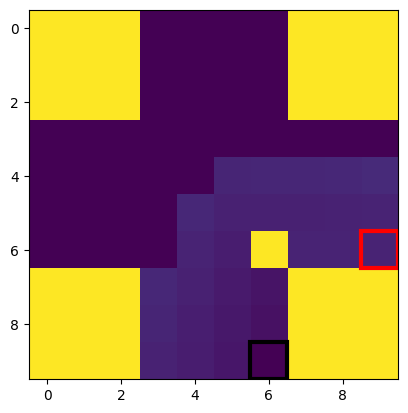

In [68]:
a_star_planner = AStarPlanner(grid_map)
start = (9,6)
goal = (6,9)
goal_found = a_star_planner.search(start, goal, heu_wgt=1)##when eu_wgt=0 is it djkstra?no heuristic function

if goal_found:
    plt.imshow(a_star_planner.cost_visualization)

    rect = plt.Rectangle((a_star_planner.start[1]-.5, a_star_planner.start[0]-.5), 1,1, fill=False, color="black", linewidth=3)
    plt.gca().add_patch(rect)

    rect = plt.Rectangle((a_star_planner.goal[1]-.5, a_star_planner.goal[0]-.5), 1,1, fill=False, color="red", linewidth=3)
    plt.gca().add_patch(rect)

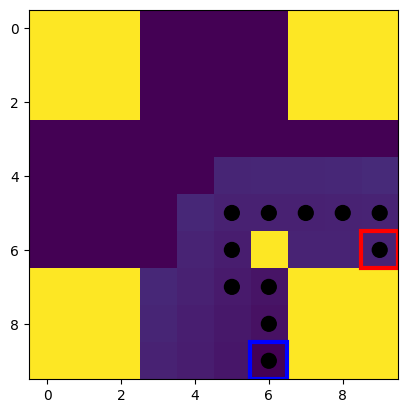

In [69]:
if goal_found:
    plt.imshow(a_star_planner.cost_visualization)

    rect = plt.Rectangle((a_star_planner.start[1]-.5, a_star_planner.start[0]-.5), 1,1, fill=False, color="blue", linewidth=3)
    plt.gca().add_patch(rect)

    rect = plt.Rectangle((a_star_planner.goal[1]-.5, a_star_planner.goal[0]-.5), 1,1, fill=False, color="red", linewidth=3)
    plt.gca().add_patch(rect)

    cur = a_star_planner.goal
    path = []
    while cur != None:
        path.append(cur)
        cur = a_star_planner.track_back[cur]
    path.reverse()
    
    for footprint in path:
        crle = plt.Circle((footprint[1], footprint[0]), 0.2, fill=True, color="black", linewidth=1)
        plt.gca().add_patch(crle)